# KIVA MICRO-LOANS

- What is KIVA?

      A microloan organisation based in USA with a span across 77 countries across the globe.
   
   
- Why this dataset?

      To explore the impact that crowd funding platforms like Kiva create.
   
   
- what do I intend to get from it or make of the data?

      A model that predicts determinants for funding.

# 01. QUESTION: 

Goal.1: Could sector and gender be the major determing factors for how fast and successful a funding is on Kiva? 

Goal.2: Is there any way to measure impact on funded projects? And how?

# Content

- Cleaning & Wrangling
- Exploratory Data Analysis
- Preprocessing
- Modelling

# 02. Data Wrangling


a) Gathering the data.

Working with a dataset about KIva micro loans from kaggle. 


A list of variables and their definitions are given below. Most of this information comes from https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding

- id: Loan ID
- funded_amount: Amount of loan which has been purchased by Kiva lenders
- paid_amount: Amount of the loan which has been paid off
- activity: Activity for which loan is requested
- sector: Sector for which loan is requested
- country_code: Country code
- country: Country name
- region: Town name
- location.geo.level: Indicator for whether the latitude and longitude given is for country or town
- partner_id: Field partner ID for local lending institutions, see a complete list at https://www.kiva.org/about/due-diligence/field-partner-role
- borrowers.first_name: First name of borrower
- borrowers.last_name: Last name of borrower
- borrowers.gender: Gender of borrower
- currency: Payment amount in local currency
- processed_date: Date payment is processed
- rounded_local_amount: Rounded local payment amount
- settlement_date: Settlement date of payment
- lat: Latitude of loan location, as indicated by location.geo.level
- lon: Longitude of loan location, as indicated by location.geo.level

Source: https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding

In [1]:
conda install ipykernel --name Python3


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\JKM\anaconda3\envs\Python3



In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


b) Processing the data

In [3]:
# The dataset that will be used to build a model that can predict the impact of micro loans based on certain features


kiva_df = pd.read_csv('kiva_d_loans.csv')

In [4]:
kiva_df

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


Descriptive Data Analysis

In [5]:
# Now that the data has been loaded, lets us check the first 5 rows of the dataset 

kiva_df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [6]:
# To understand the dimensions of the dataframe, let’s check the number of rows and columns present in the dataset.

kiva_df.shape

(671205, 20)

In [7]:
# Now will let's check the data types along with the concise summary of all the variables in the dataset inclusing the number of non-null values present.

kiva_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
# The type of data will be stored as an object if there are strings present in the variables. It will be int or float if the data has numerical and decimal values respectively.

kiva_df.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [9]:
# Defining the columns
kiva_df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [10]:
kiva_df.index

RangeIndex(start=0, stop=671205, step=1)

In [11]:
kiva_df.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [12]:
#
kiva_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,671205.0,993248.593734,196611.275423,653047.0,823072.0,992780.0,1163653.0,1340339.0
funded_amount,671205.0,785.995061,1130.398941,0.0,250.0,450.0,900.0,100000.0
loan_amount,671205.0,842.397107,1198.660073,25.0,275.0,500.0,1000.0,100000.0
partner_id,657698.0,178.199616,94.247581,9.0,126.0,145.0,204.0,536.0
term_in_months,671205.0,13.739022,8.598919,1.0,8.0,13.0,14.0,158.0
lender_count,671205.0,20.590922,28.459551,0.0,7.0,13.0,24.0,2986.0


In [13]:
kiva_df.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [14]:
kiva_df.select_dtypes(float)

,funded_amount,loan_amount,partner_id,term_in_months
0,300.0,300.0,247.0,12.0
1,575.0,575.0,247.0,11.0
2,150.0,150.0,334.0,43.0
3,200.0,200.0,247.0,11.0
4,400.0,400.0,245.0,14.0
...,...,...,...,...
671200,0.0,25.0,58.0,13.0
671201,25.0,25.0,138.0,13.0
671202,0.0,25.0,138.0,13.0
671203,0.0,25.0,138.0,13.0


In [15]:
len(kiva_df)

671205

In [16]:
kiva_df.select_dtypes(object)

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,NaN,female,irregular,2014-01-01
1,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,NaN,"female, female",irregular,2014-01-01
2,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,"user_favorite, user_favorite",female,bullet,2014-01-01
3,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,NaN,female,irregular,2014-01-01
4,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,NaN,female,monthly,2017-07-25
671201,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,NaN,female,monthly,2017-07-25
671202,Games,Entertainment,NaN,KE,Kenya,NaN,KES,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,NaN,NaN,monthly,2017-07-26
671203,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,NaN,female,monthly,2017-07-26


In [17]:
kiva_df.select_dtypes(int)

""
0
1
2
3
4
...
671200
671201
671202
671203


<AxesSubplot:>

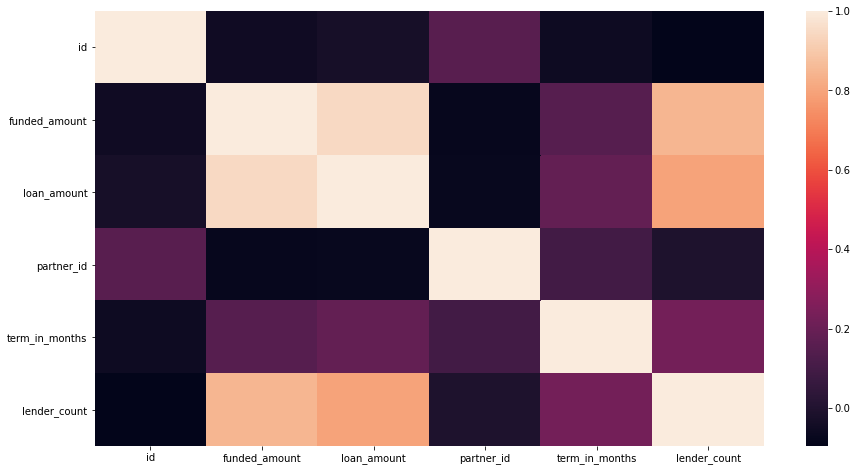

In [18]:
# what correlation exists between variables
corr = kiva_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

c) Cleaning the data

In [19]:
# It is not necessary that all the columns in the data are relevant. So I am dropping the columns mentioned below from the dataset.


subset = [
     'id','currency',
       'date', 
      'country_code', 'tags', 'use', 'partner_id',
      'region', 'posted_time'     
]

kiva_df1 = kiva_df.drop(subset, axis=1)



In [20]:
kiva_df1.head()

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly


In [21]:
# what is the unique number for each variable

for c in kiva_df1.columns.tolist():         # know the number of unique values for each column
    print(c, len(kiva_df1[c].unique()))

funded_amount 610
loan_amount 479
activity 163
sector 15
country 87
disbursed_time 5720
funded_time 498008
term_in_months 148
lender_count 503
borrower_genders 11299
repayment_interval 4


In [22]:
kiva_df1.columns

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'country',
       'disbursed_time', 'funded_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval'],
      dtype='object')

In [23]:
# standardising columns for any existent upper cases

cols = []
for i in range(len(kiva_df1.columns)):
    cols.append(kiva_df1.columns[i].lower().replace(' ','_'))
kiva_df1.columns = cols
print(kiva_df1.columns)

Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'country',
       'disbursed_time', 'funded_time', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval'],
      dtype='object')


In [24]:
# Let’s check columns missing the data (Nulls)

kiva_df1.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [25]:
kiva_df1= kiva_df1.replace(' ', np.nan)

In [26]:
kiva_df1.isnull().sum()

funded_amount             0
loan_amount               0
activity                  0
sector                    0
country                   0
disbursed_time         2396
funded_time           48331
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [27]:
kiva_df1.dtypes

funded_amount         float64
loan_amount           float64
activity               object
sector                 object
country                object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
borrower_genders       object
repayment_interval     object
dtype: object

In [28]:
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,Paraguay,2017-07-25 07:00:00+00:00,NaN,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,Kenya,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,Kenya,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,Kenya,2017-07-25 07:00:00+00:00,NaN,13.0,0,female,monthly


In [29]:
kiva_df1


,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,Paraguay,2017-07-25 07:00:00+00:00,NaN,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,Kenya,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,Kenya,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,Kenya,2017-07-25 07:00:00+00:00,NaN,13.0,0,female,monthly


In [30]:
for i in kiva_df1['disbursed_time']:
    if str(i).startswith('2013-01'):
        print(i)

In [31]:
kiva_df1['disbursed_time'] = [str(i).split()[0][:7] for i in kiva_df1['disbursed_time']]
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01-02 10:06:32+00:00,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01-02 09:17:23+00:00,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01-01 16:01:36+00:00,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01-01 13:00:00+00:00,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12,2014-01-01 19:18:51+00:00,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,Paraguay,2017-07,NaN,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,Kenya,2017-07,2017-07-26 02:09:43+00:00,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,Kenya,2017-07,NaN,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,Kenya,2017-07,NaN,13.0,0,female,monthly


In [32]:
kiva_df1['funded_time'] = [str(i).split()[0][:7] for i in kiva_df1['funded_time']]
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12,2014-01,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,Paraguay,2017-07,nan,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,Kenya,2017-07,2017-07,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,Kenya,2017-07,nan,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,Kenya,2017-07,nan,13.0,0,female,monthly


In [33]:
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,Pakistan,2013-12,2014-01,14.0,16,female,monthly
...,...,...,...,...,...,...,...,...,...,...,...
671200,0.0,25.0,Livestock,Agriculture,Paraguay,2017-07,nan,13.0,0,female,monthly
671201,25.0,25.0,Livestock,Agriculture,Kenya,2017-07,2017-07,13.0,1,female,monthly
671202,0.0,25.0,Games,Entertainment,Kenya,2017-07,nan,13.0,0,NaN,monthly
671203,0.0,25.0,Livestock,Agriculture,Kenya,2017-07,nan,13.0,0,female,monthly


In [34]:
kiva_df1['borrower_genders'].value_counts()

female                                                                                                                                                                                                                    426502
male                                                                                                                                                                                                                      134710
female, female                                                                                                                                                                                                             12164
female, female, female                                                                                                                                                                                                     11676
female, female, female, female                                                                      

In [35]:
# Dealing with the multiple gender, I will use a conditional statement of if elif else.

def gender_entries(borrower_genders):
    genders = borrower_genders.split(",")
    genders = list(set(genders))
    genders = [borrower_genders.strip() for borrower_genders in genders]
    if len(genders)==2:
        if 'female' in genders and 'male' in genders:
            return 'both'
        elif 'female' in genders:
            return 'females'
        elif 'male' in genders:
            return 'males'
    elif genders[0]=='female':
        return 'female'
    elif genders[0]=='male':
        return 'male'
    else:
        return 'unknown'

In [36]:
kiva_df1['borrower_genders'][kiva_df1['borrower_genders'].isnull()]= 'unknown'
kiva_df1['genders'] = kiva_df1['borrower_genders'].apply(gender_entries)

In [37]:
kiva_df1['genders'].value_counts()

female     426502
male       168792
females     61579
both         6298
unknown      4221
males        3813
Name: genders, dtype: int64

In [38]:
kiva_df1 = kiva_df1.drop(kiva_df1[kiva_df1['genders'] == 'both'].index)

In [39]:
kiva_df1['genders'].value_counts()

female     426502
male       168792
females     61579
unknown      4221
males        3813
Name: genders, dtype: int64

In [40]:
# 5 Point (statistical summary)

#The 5-point summary tells the descriptive summary which includes mean, median, mode, no. of rows, maximum value, and minimum value for each variable.

kiva_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amount,664907.0,785.020409,1129.393010,0.0,250.0,450.0,900.0,100000.0
loan_amount,664907.0,841.384021,1197.760001,25.0,275.0,500.0,1000.0,100000.0
term_in_months,664907.0,13.766912,8.594271,1.0,8.0,13.0,14.0,158.0
lender_count,664907.0,20.565087,28.426242,0.0,7.0,13.0,24.0,2986.0


In [41]:
kiva_df1.isnull().sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
country               0
disbursed_time        0
funded_time           0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
genders               0
dtype: int64

<AxesSubplot:>

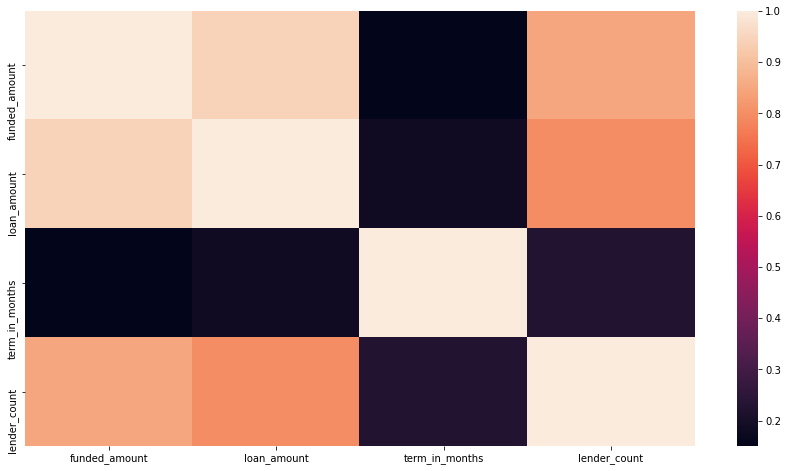

In [42]:
# Checkin the correlation again after the processing and cleanig

corr = kiva_df1.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [43]:
num_cols = kiva_df1.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', kiva_df1['funded_amount'].corr(kiva_df1[column]))

funded_amount --> 1.0
loan_amount --> 0.94482235094625
term_in_months --> 0.1506737132675751
lender_count --> 0.8487116122937531


Checking the number of values in each variable
# Genders

In [44]:
kiva_df1['genders'].value_counts()

female     426502
male       168792
females     61579
unknown      4221
males        3813
Name: genders, dtype: int64

# Sector

In [45]:
kiva_df1['sector'].value_counts()

Agriculture       178731
Food              135849
Retail            123920
Services           44989
Personal Use       33817
Housing            33641
Clothing           32526
Education          30980
Transportation     15469
Arts               11994
Health              9125
Construction        6227
Manufacturing       6179
Entertainment        827
Wholesale            633
Name: sector, dtype: int64

# Activity

In [46]:
kiva_df1['activity'].value_counts()

Farming                      72109
General Store                64616
Personal Housing Expenses    32359
Food Production/Sales        27996
Agriculture                  26686
                             ...  
Film                            12
Personal Care Products           7
Celebrations                     5
Event Planning                   5
Adult Care                       2
Name: activity, Length: 163, dtype: int64

# Country

In [47]:
kiva_df1['country'].value_counts()

Philippines      160441
Kenya             75404
El Salvador       39872
Cambodia          31719
Pakistan          26857
                  ...  
Bhutan                2
Afghanistan           2
Cote D'Ivoire         1
Mauritania            1
Guam                  1
Name: country, Length: 87, dtype: int64

# Lender Count

In [48]:
kiva_df1['lender_count']

0         12
1         14
2          6
3          8
4         16
          ..
671200     0
671201     1
671202     0
671203     0
671204     0
Name: lender_count, Length: 664907, dtype: int64

In [49]:
kiva_df1['lender_count'].unique

<bound method Series.unique of 0         12
1         14
2          6
3          8
4         16
          ..
671200     0
671201     1
671202     0
671203     0
671204     0
Name: lender_count, Length: 664907, dtype: int64>

In [50]:
kiva_df1['lender_count'].nunique

<bound method IndexOpsMixin.nunique of 0         12
1         14
2          6
3          8
4         16
          ..
671200     0
671201     1
671202     0
671203     0
671204     0
Name: lender_count, Length: 664907, dtype: int64>

<AxesSubplot:xlabel='genders', ylabel='funded_amount'>

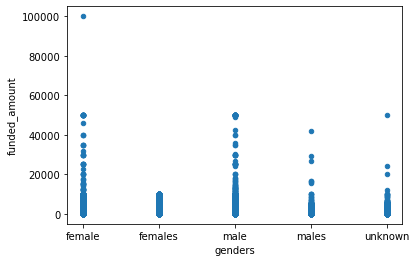

In [51]:
#  Visualising variables

kiva_df1.plot(kind='scatter', x='genders', y='funded_amount')

<AxesSubplot:xlabel='loan_amount', ylabel='funded_amount'>

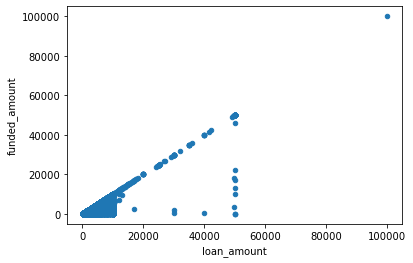

In [52]:
kiva_df1.plot(kind='scatter', x='loan_amount', y='funded_amount')

<AxesSubplot:xlabel='term_in_months', ylabel='funded_amount'>

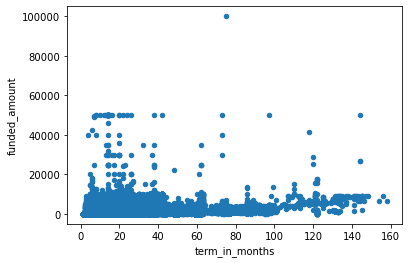

In [53]:
kiva_df1.plot(kind='scatter', x='term_in_months', y='funded_amount')

# 03. Exploratory Data Analysis

Since the data has been collected, proccessed and cleaned, it is now ready for analysis.


In [54]:
# Observing the data using various types of plots and graphs, and in this case I will be using matplotlib and seaborn.
# I will start by checking the correlation of the given variables (also known as features)



In [55]:
# creating a numerical df to explore the num data only 

numericals = kiva_df1.select_dtypes(np.number)
numericals.head()

,funded_amount,loan_amount,term_in_months,lender_count
0,300.0,300.0,12.0,12
1,575.0,575.0,11.0,14
2,150.0,150.0,43.0,6
3,200.0,200.0,11.0,8
4,400.0,400.0,14.0,16


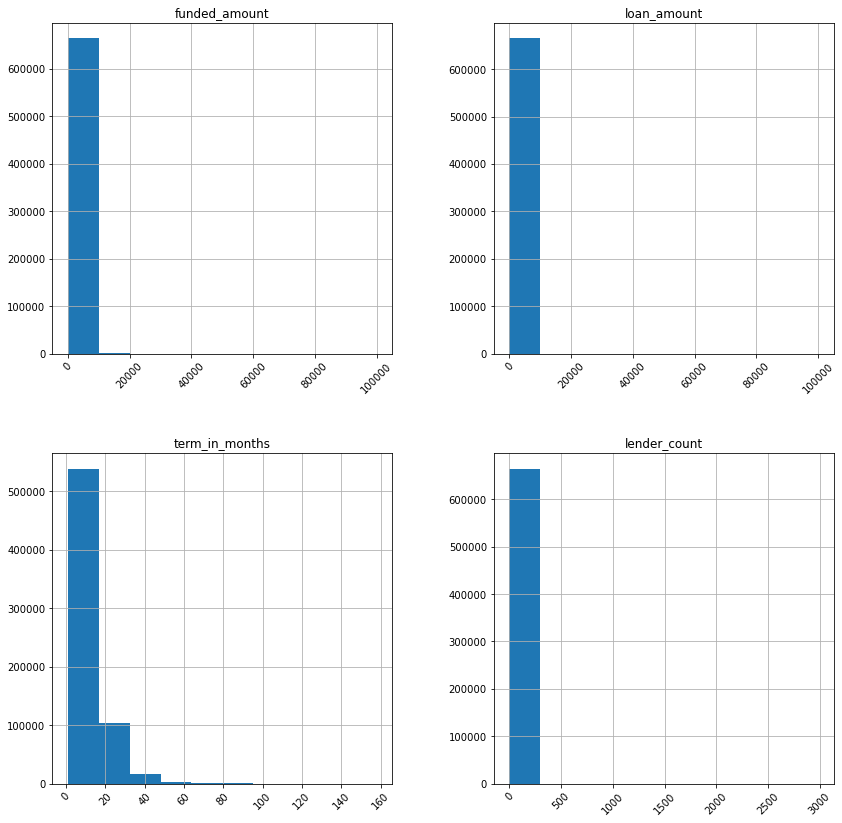

In [56]:
kiva_df1.hist(figsize=(14,14), xrot=45)
plt.show()

In [57]:
# Categorical variables

kiva_df1_cats = kiva_df1.select_dtypes(np.object)
kiva_df1_cats

,activity,sector,country,disbursed_time,funded_time,borrower_genders,repayment_interval,genders
0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,female,irregular,female
1,Rickshaw,Transportation,Pakistan,2013-12,2014-01,"female, female",irregular,females
2,Transportation,Transportation,India,2013-12,2014-01,female,bullet,female
3,Embroidery,Arts,Pakistan,2013-12,2014-01,female,irregular,female
4,Milk Sales,Food,Pakistan,2013-12,2014-01,female,monthly,female
...,...,...,...,...,...,...,...,...
671200,Livestock,Agriculture,Paraguay,2017-07,nan,female,monthly,female
671201,Livestock,Agriculture,Kenya,2017-07,2017-07,female,monthly,female
671202,Games,Entertainment,Kenya,2017-07,nan,unknown,monthly,unknown
671203,Livestock,Agriculture,Kenya,2017-07,nan,female,monthly,female


In [58]:
# Removing duplicate values

kiva_df1 = kiva_df1.drop_duplicates(keep=False)
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,female,irregular,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,"female, female",irregular,females
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,female,bullet,female
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,female,irregular,female
5,250.0,250.0,Services,Services,Kenya,2014-01,2014-01,4.0,6,female,irregular,female
...,...,...,...,...,...,...,...,...,...,...,...,...
671156,75.0,250.0,Livestock,Agriculture,Ghana,2017-07,nan,13.0,3,female,monthly,female
671157,75.0,75.0,Livestock,Agriculture,Mexico,2017-07,2017-07,13.0,3,female,monthly,female
671159,50.0,725.0,Livestock,Agriculture,Bolivia,2017-07,nan,13.0,2,female,monthly,female
671171,0.0,25.0,Games,Entertainment,Kenya,2017-07,nan,13.0,0,"female, female",monthly,females


In [59]:
kiva_df1.drop(['borrower_genders', 'gender'], inplace=True, axis=1, errors='ignore')

In [60]:
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,repayment_interval,genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,irregular,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,irregular,females
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,bullet,female
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,irregular,female
5,250.0,250.0,Services,Services,Kenya,2014-01,2014-01,4.0,6,irregular,female
...,...,...,...,...,...,...,...,...,...,...,...
671156,75.0,250.0,Livestock,Agriculture,Ghana,2017-07,nan,13.0,3,monthly,female
671157,75.0,75.0,Livestock,Agriculture,Mexico,2017-07,2017-07,13.0,3,monthly,female
671159,50.0,725.0,Livestock,Agriculture,Bolivia,2017-07,nan,13.0,2,monthly,female
671171,0.0,25.0,Games,Entertainment,Kenya,2017-07,nan,13.0,0,monthly,females


# The Target Variables

In [61]:
kiva_df1

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,repayment_interval,genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,irregular,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,irregular,females
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,bullet,female
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,irregular,female
5,250.0,250.0,Services,Services,Kenya,2014-01,2014-01,4.0,6,irregular,female
...,...,...,...,...,...,...,...,...,...,...,...
671156,75.0,250.0,Livestock,Agriculture,Ghana,2017-07,nan,13.0,3,monthly,female
671157,75.0,75.0,Livestock,Agriculture,Mexico,2017-07,2017-07,13.0,3,monthly,female
671159,50.0,725.0,Livestock,Agriculture,Bolivia,2017-07,nan,13.0,2,monthly,female
671171,0.0,25.0,Games,Entertainment,Kenya,2017-07,nan,13.0,0,monthly,females


Will prepare the data for preproccessing by making some small changes

In [62]:
#kiva_df1.drop(columns=["repayment_interval"], inplace=True)

In [63]:
#kiva_df1.reset_index(drop=True, inplace=True)

In [64]:
kiva_df1.head()

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,repayment_interval,genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,irregular,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,irregular,females
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,bullet,female
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,irregular,female
5,250.0,250.0,Services,Services,Kenya,2014-01,2014-01,4.0,6,irregular,female


In [65]:
#sub_df is a subset of kiva_df where funded_amount is different than loan_amount. Only sector is displayed

sub_df = kiva_df1.loc[kiva_df1.funded_amount != kiva_df1.loan_amount].activity


In [66]:
#sub_df is a subset of kiva_df where funded_amount is different than loan_amount. Only sector is displayed

sub_df = kiva_df1.loc[kiva_df1.funded_amount != kiva_df1.loan_amount].activity

#pivot_sub calculates what is the % of applications with different loan_amount and funded_amount within a sector

pivot_sub = 100*sub_df.value_counts() / kiva_df1.activity.value_counts()
pivot_sub.sort_values(ascending=False).head(25)

Technology                   52.702703
Communications               39.325843
Cleaning Services            31.538462
Wedding Expenses             28.140704
Phone Use Sales              25.773196
Mobile Transactions          21.428571
Landscaping / Gardening      20.588235
Electronics Sales            20.332717
Vehicle                      17.412531
Spare Parts                  16.313214
Mobile Phones                16.153846
Personal Housing Expenses    16.014358
Entertainment                16.009852
Taxi                         15.983936
Phone Accessories            15.734990
Personal Expenses            15.731838
Pub                          15.600449
Auto Repair                  15.483384
Vehicle Repairs              15.196078
Electrical Goods             15.075377
Services                     14.312662
Hardware                     13.490364
Cattle                       13.308540
Barber Shop                  12.446809
Butcher Shop                 12.354805
Name: activity, dtype: fl

In [67]:
pivot_sub.sort_values(ascending=False).tail(25)

Medical Clinic            0.628931
Manufacturing             0.524617
Textiles                  0.442968
Waste Management          0.341297
Weaving                   0.275916
Knitting                  0.246914
Pharmacy                  0.204918
Adult Care                     NaN
Balut-Making                   NaN
Bicycle Repair                 NaN
Bicycle Sales                  NaN
Bookbinding                    NaN
Call Center                    NaN
Celebrations                   NaN
Event Planning                 NaN
Film                           NaN
Funerals                       NaN
Machine Shop                   NaN
Musical Instruments            NaN
Musical Performance            NaN
Patchwork                      NaN
Personal Care Products         NaN
Religious Articles             NaN
Secretarial Services           NaN
Well digging                   NaN
Name: activity, dtype: float64

In [68]:
pivot_sub

Adult Care                  NaN
Agriculture           10.332912
Air Conditioning       5.555556
Animal Sales           7.192118
Aquaculture            9.433962
                        ...    
Water Distribution     2.398524
Weaving                0.275916
Wedding Expenses      28.140704
Well digging                NaN
Wholesale              3.098592
Name: activity, Length: 163, dtype: float64

Visualising the variable

In [69]:
# I am using pywedge for visualisation to better understand the hidden patterns in the data.
# Also because it is user friendly since it is interactive

import pywedge as pw
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style"))

mc = pw.Pywedge_Charts(kiva_df1, c=None, y = 'funded_amount')


In [70]:
# Pease select any plot and feature of choice and make the chart for visualisation

charts = mc.make_charts()


HTML(value='<h2>Pywedge Make_Charts </h2>')

In [71]:
kiva_df1.sector.value_counts()

Agriculture       141789
Food              116732
Retail             94406
Services           40029
Clothing           29648
Education          25461
Housing            24373
Personal Use       17997
Transportation     14209
Arts               10476
Health              8625
Construction        6107
Manufacturing       5978
Entertainment        785
Wholesale            629
Name: sector, dtype: int64

In [72]:
# 

# 04. Data Preprocessing

Preparing the data for further processing.


# Tasks:

- num vs cat data (split)
- multicollinearity
- imbalance
- distribution plots (normalising, scaling, outlier detection)
- normalizer
- encoding into dummies


In [73]:
kiva_df1.dtypes

funded_amount         float64
loan_amount           float64
activity               object
sector                 object
country                object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
repayment_interval     object
genders                object
dtype: object

In [74]:
#kiva_df=pd.get_dummies(kiva_df, columns=['loan_amount'])

In [75]:
kiva_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537244 entries, 0 to 671181
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       537244 non-null  float64
 1   loan_amount         537244 non-null  float64
 2   activity            537244 non-null  object 
 3   sector              537244 non-null  object 
 4   country             537244 non-null  object 
 5   disbursed_time      537244 non-null  object 
 6   funded_time         537244 non-null  object 
 7   term_in_months      537244 non-null  float64
 8   lender_count        537244 non-null  int64  
 9   repayment_interval  537244 non-null  object 
 10  genders             537244 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 49.2+ MB


In [76]:
#kiva_df.reset_index(drop=True, inplace=True)

In [77]:
kiva_nums = kiva_df1.select_dtypes(np.number)

In [78]:
# Numericals

kiva_nums = kiva_df1.select_dtypes(np.number)
kiva_nums.head()



,funded_amount,loan_amount,term_in_months,lender_count
0,300.0,300.0,12.0,12
1,575.0,575.0,11.0,14
2,150.0,150.0,43.0,6
3,200.0,200.0,11.0,8
5,250.0,250.0,4.0,6


In [79]:
# 
from sklearn.preprocessing import MinMaxScaler

In [80]:
transformer = MinMaxScaler().fit(kiva_nums)
x_mmscaled = transformer.transform(kiva_nums)
print(x_mmscaled.shape)

(537244, 4)


In [81]:
x_mmscaled

array([[0.003     , 0.00275069, 0.07006369, 0.00401875],
       [0.00575   , 0.00550138, 0.06369427, 0.00468855],
       [0.0015    , 0.00125031, 0.26751592, 0.00200938],
       ...,
       [0.0005    , 0.00700175, 0.07643312, 0.00066979],
       [0.        , 0.        , 0.07643312, 0.        ],
       [0.        , 0.        , 0.07643312, 0.        ]])

In [82]:
kiva_cat = kiva_df.select_dtypes(np.object)# you can also use this to split the data before scaling / OHE
kiva_cat.head()

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,NaN,female,irregular,2014-01-01
1,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,NaN,"female, female",irregular,2014-01-01
2,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,"user_favorite, user_favorite",female,bullet,2014-01-01
3,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,NaN,female,irregular,2014-01-01
4,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,NaN,female,monthly,2014-01-01


In [83]:
#drop dates?(data = people_income,columns=[

In [84]:
kiva_processed = pd.get_dummies(data=kiva_df1, columns=["sector","activity","disbursed_time", "funded_time", "country","genders"],drop_first=True)
kiva_processed

,funded_amount,loan_amount,term_in_months,lender_count,repayment_interval,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,activity_Agriculture,activity_Air Conditioning,activity_Animal Sales,activity_Aquaculture,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Balut-Making,activity_Barber Shop,activity_Beauty Salon,activity_Beekeeping,activity_Beverages,activity_Bicycle Repair,activity_Bicycle Sales,activity_Blacksmith,activity_Bookbinding,activity_Bookstore,activity_Bricks,activity_Butcher Shop,activity_Cafe,activity_Call Center,activity_Carpentry,activity_Catering,activity_Cattle,activity_Celebrations,activity_Cement,activity_Cereals,activity_Charcoal Sales,activity_Cheese Making,activity_Child Care,activity_Cleaning Services,activity_Cloth & Dressmaking Supplies,activity_Clothing,activity_Clothing Sales,activity_Cobbler,activity_Communications,activity_Computer,activity_Computers,activity_Construction,activity_Construction Supplies,activity_Consumer Goods,activity_Cosmetics Sales,activity_Crafts,activity_Dairy,activity_Decorations Sales,activity_Dental,activity_Education provider,activity_Electrical Goods,activity_Electrician,activity_Electronics Repair,activity_Electronics Sales,activity_Embroidery,activity_Energy,activity_Entertainment,activity_Event Planning,activity_Farm Supplies,activity_Farming,activity_Film,activity_Fish Selling,activity_Fishing,activity_Florist,activity_Flowers,activity_Food,activity_Food Market,activity_Food Production/Sales,activity_Food Stall,activity_Fruits & Vegetables,activity_Fuel/Firewood,activity_Funerals,activity_Furniture Making,activity_Games,activity_General Store,activity_Goods Distribution,activity_Grocery Store,activity_Hardware,activity_Health,activity_Higher education costs,activity_Home Appliances,activity_Home Energy,activity_Home Products Sales,activity_Hotel,activity_Internet Cafe,activity_Jewelry,activity_Knitting,activity_Land Rental,activity_Landscaping / Gardening,activity_Laundry,activity_Liquor Store / Off-License,activity_Livestock,activity_Machine Shop,activity_Machinery Rental,activity_Manufacturing,activity_Medical Clinic,activity_Metal Shop,activity_Milk Sales,activity_Mobile Phones,activity_Mobile Transactions,activity_Motorcycle Repair,activity_Motorcycle Transport,activity_Movie Tapes & DVDs,activity_Music Discs & Tapes,activity_Musical Instruments,activity_Musical Performance,activity_Natural Medicines,activity_Office Supplies,activity_Paper Sales,activity_Party Supplies,activity_Patchwork,activity_Perfumes,activity_Personal Care Products,activity_Personal Expenses,activity_Personal Housing Expenses,activity_Personal Medical Expenses,activity_Personal Products Sales,activity_Pharmacy,activity_Phone Accessories,activity_Phone Repair,activity_Phone Use Sales,activity_Photography,activity_Pigs,activity_Plastics Sales,activity_Poultry,activity_Primary/secondary school costs,activity_Printing,activity_Property,activity_Pub,activity_Quarrying,activity_Recycled Materials,activity_Recycling,activity_Religious Articles,activity_Renewable Energy Products,activity_Restaurant,activity_Retail,activity_Rickshaw,activity_Secretarial Services,activity_Services,activity_Sewing,activity_Shoe Sales,activity_Souvenir Sales,activity_Spare Parts,activity_Sporting Good Sales,activity_Tailoring,activity_Taxi,activity_Technology,activity_Textiles,activity_Timber Sales,activity_Tourism,activity_Transportation,activity_Traveling Sales,activity_Upholstery,activity_Used Clothing,activity_Used Shoes,activity_Utilities,activity_Vehicle,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wedding Expenses,activity_Well digging,activity_Wholesale,disbursed_time_2014-01,disbursed_time_2014-02,disbursed_time_2014-03,disburse

In [85]:
# y = sector

In [86]:
#categoricals2 = kiva_df.select_dtypes(np.object)# you can also use this to split the data before scaling / OHE
#categoricals2.head()

In [87]:
#y= categoricals['genders']
#categoricals=categoricals.drop(['genders'], axis=1)
#categoricals

In [88]:
kiva_df1.corr()


,funded_amount,loan_amount,term_in_months,lender_count
funded_amount,1.000000,0.948892,0.147121,0.842389
loan_amount,0.948892,1.000000,0.183844,0.795337
term_in_months,0.147121,0.183844,1.000000,0.231248
lender_count,0.842389,0.795337,0.231248,1.000000


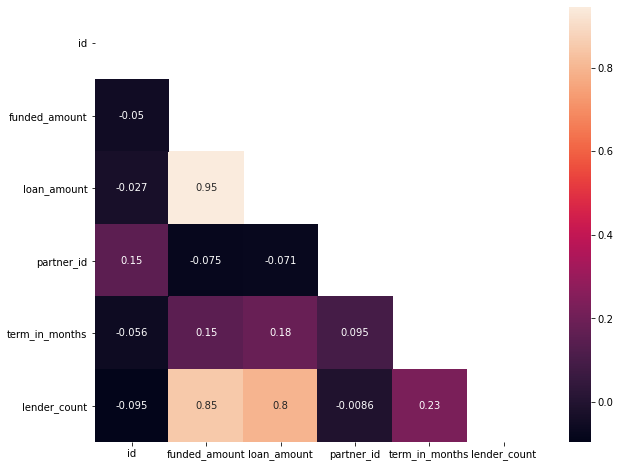

In [89]:
mask = np.zeros_like(kiva_df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(kiva_df.corr(), mask=mask, annot=True)
plt.show()


# The Split : Into Dependent and independent Variables

In [90]:
X = kiva_df1[['loan_amount', 'genders', 'sector']]
y = kiva_df1[['funded_amount']]


In [91]:
#plt.figure(figsize=(15,8))
#plt.ticklabel_format(axis='y', style='plain')
#plt.scatter(X, y)


In [92]:
len(X)

537244

In [93]:
len(y)

537244

# Dump Model

In [94]:
X

,loan_amount,genders,sector
0,300.0,female,Food
1,575.0,females,Transportation
2,150.0,female,Transportation
3,200.0,female,Arts
5,250.0,female,Services
...,...,...,...
671156,250.0,female,Agriculture
671157,75.0,female,Agriculture
671159,725.0,female,Agriculture
671171,25.0,females,Entertainment


In [95]:
y

,funded_amount
0,300.0
1,575.0
2,150.0
3,200.0
5,250.0
...,...
671156,75.0
671157,75.0
671159,50.0
671171,0.0


In [96]:
kiva_processed.head()

,funded_amount,loan_amount,term_in_months,lender_count,repayment_interval,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,activity_Agriculture,activity_Air Conditioning,activity_Animal Sales,activity_Aquaculture,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Balut-Making,activity_Barber Shop,activity_Beauty Salon,activity_Beekeeping,activity_Beverages,activity_Bicycle Repair,activity_Bicycle Sales,activity_Blacksmith,activity_Bookbinding,activity_Bookstore,activity_Bricks,activity_Butcher Shop,activity_Cafe,activity_Call Center,activity_Carpentry,activity_Catering,activity_Cattle,activity_Celebrations,activity_Cement,activity_Cereals,activity_Charcoal Sales,activity_Cheese Making,activity_Child Care,activity_Cleaning Services,activity_Cloth & Dressmaking Supplies,activity_Clothing,activity_Clothing Sales,activity_Cobbler,activity_Communications,activity_Computer,activity_Computers,activity_Construction,activity_Construction Supplies,activity_Consumer Goods,activity_Cosmetics Sales,activity_Crafts,activity_Dairy,activity_Decorations Sales,activity_Dental,activity_Education provider,activity_Electrical Goods,activity_Electrician,activity_Electronics Repair,activity_Electronics Sales,activity_Embroidery,activity_Energy,activity_Entertainment,activity_Event Planning,activity_Farm Supplies,activity_Farming,activity_Film,activity_Fish Selling,activity_Fishing,activity_Florist,activity_Flowers,activity_Food,activity_Food Market,activity_Food Production/Sales,activity_Food Stall,activity_Fruits & Vegetables,activity_Fuel/Firewood,activity_Funerals,activity_Furniture Making,activity_Games,activity_General Store,activity_Goods Distribution,activity_Grocery Store,activity_Hardware,activity_Health,activity_Higher education costs,activity_Home Appliances,activity_Home Energy,activity_Home Products Sales,activity_Hotel,activity_Internet Cafe,activity_Jewelry,activity_Knitting,activity_Land Rental,activity_Landscaping / Gardening,activity_Laundry,activity_Liquor Store / Off-License,activity_Livestock,activity_Machine Shop,activity_Machinery Rental,activity_Manufacturing,activity_Medical Clinic,activity_Metal Shop,activity_Milk Sales,activity_Mobile Phones,activity_Mobile Transactions,activity_Motorcycle Repair,activity_Motorcycle Transport,activity_Movie Tapes & DVDs,activity_Music Discs & Tapes,activity_Musical Instruments,activity_Musical Performance,activity_Natural Medicines,activity_Office Supplies,activity_Paper Sales,activity_Party Supplies,activity_Patchwork,activity_Perfumes,activity_Personal Care Products,activity_Personal Expenses,activity_Personal Housing Expenses,activity_Personal Medical Expenses,activity_Personal Products Sales,activity_Pharmacy,activity_Phone Accessories,activity_Phone Repair,activity_Phone Use Sales,activity_Photography,activity_Pigs,activity_Plastics Sales,activity_Poultry,activity_Primary/secondary school costs,activity_Printing,activity_Property,activity_Pub,activity_Quarrying,activity_Recycled Materials,activity_Recycling,activity_Religious Articles,activity_Renewable Energy Products,activity_Restaurant,activity_Retail,activity_Rickshaw,activity_Secretarial Services,activity_Services,activity_Sewing,activity_Shoe Sales,activity_Souvenir Sales,activity_Spare Parts,activity_Sporting Good Sales,activity_Tailoring,activity_Taxi,activity_Technology,activity_Textiles,activity_Timber Sales,activity_Tourism,activity_Transportation,activity_Traveling Sales,activity_Upholstery,activity_Used Clothing,activity_Used Shoes,activity_Utilities,activity_Vehicle,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wedding Expenses,activity_Well digging,activity_Wholesale,disbursed_time_2014-01,disbursed_time_2014-02,disbursed_time_2014-03,disburse

# Preprocessing

Scaling the Data

In [97]:
X = kiva_processed.drop('loan_amount', axis=1) 
y = kiva_processed['funded_amount']



In [98]:
# Bringing the numerical data (scaled)in with the x cat
#X = np.concatenate((x_normalized, kiva_cat),axis=1)

In [99]:
#len(X), len(y), len(preprocessed_numericals), len(x_mmscaled)

# 05. Apply Model

In [100]:
X

,funded_amount,term_in_months,lender_count,repayment_interval,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,activity_Agriculture,activity_Air Conditioning,activity_Animal Sales,activity_Aquaculture,activity_Arts,activity_Auto Repair,activity_Bakery,activity_Balut-Making,activity_Barber Shop,activity_Beauty Salon,activity_Beekeeping,activity_Beverages,activity_Bicycle Repair,activity_Bicycle Sales,activity_Blacksmith,activity_Bookbinding,activity_Bookstore,activity_Bricks,activity_Butcher Shop,activity_Cafe,activity_Call Center,activity_Carpentry,activity_Catering,activity_Cattle,activity_Celebrations,activity_Cement,activity_Cereals,activity_Charcoal Sales,activity_Cheese Making,activity_Child Care,activity_Cleaning Services,activity_Cloth & Dressmaking Supplies,activity_Clothing,activity_Clothing Sales,activity_Cobbler,activity_Communications,activity_Computer,activity_Computers,activity_Construction,activity_Construction Supplies,activity_Consumer Goods,activity_Cosmetics Sales,activity_Crafts,activity_Dairy,activity_Decorations Sales,activity_Dental,activity_Education provider,activity_Electrical Goods,activity_Electrician,activity_Electronics Repair,activity_Electronics Sales,activity_Embroidery,activity_Energy,activity_Entertainment,activity_Event Planning,activity_Farm Supplies,activity_Farming,activity_Film,activity_Fish Selling,activity_Fishing,activity_Florist,activity_Flowers,activity_Food,activity_Food Market,activity_Food Production/Sales,activity_Food Stall,activity_Fruits & Vegetables,activity_Fuel/Firewood,activity_Funerals,activity_Furniture Making,activity_Games,activity_General Store,activity_Goods Distribution,activity_Grocery Store,activity_Hardware,activity_Health,activity_Higher education costs,activity_Home Appliances,activity_Home Energy,activity_Home Products Sales,activity_Hotel,activity_Internet Cafe,activity_Jewelry,activity_Knitting,activity_Land Rental,activity_Landscaping / Gardening,activity_Laundry,activity_Liquor Store / Off-License,activity_Livestock,activity_Machine Shop,activity_Machinery Rental,activity_Manufacturing,activity_Medical Clinic,activity_Metal Shop,activity_Milk Sales,activity_Mobile Phones,activity_Mobile Transactions,activity_Motorcycle Repair,activity_Motorcycle Transport,activity_Movie Tapes & DVDs,activity_Music Discs & Tapes,activity_Musical Instruments,activity_Musical Performance,activity_Natural Medicines,activity_Office Supplies,activity_Paper Sales,activity_Party Supplies,activity_Patchwork,activity_Perfumes,activity_Personal Care Products,activity_Personal Expenses,activity_Personal Housing Expenses,activity_Personal Medical Expenses,activity_Personal Products Sales,activity_Pharmacy,activity_Phone Accessories,activity_Phone Repair,activity_Phone Use Sales,activity_Photography,activity_Pigs,activity_Plastics Sales,activity_Poultry,activity_Primary/secondary school costs,activity_Printing,activity_Property,activity_Pub,activity_Quarrying,activity_Recycled Materials,activity_Recycling,activity_Religious Articles,activity_Renewable Energy Products,activity_Restaurant,activity_Retail,activity_Rickshaw,activity_Secretarial Services,activity_Services,activity_Sewing,activity_Shoe Sales,activity_Souvenir Sales,activity_Spare Parts,activity_Sporting Good Sales,activity_Tailoring,activity_Taxi,activity_Technology,activity_Textiles,activity_Timber Sales,activity_Tourism,activity_Transportation,activity_Traveling Sales,activity_Upholstery,activity_Used Clothing,activity_Used Shoes,activity_Utilities,activity_Vehicle,activity_Vehicle Repairs,activity_Veterinary Sales,activity_Waste Management,activity_Water Distribution,activity_Weaving,activity_Wedding Expenses,activity_Well digging,activity_Wholesale,disbursed_time_2014-01,disbursed_time_2014-02,disbursed_time_2014-03,disbursed_time_2014-

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x_mmscaled, y, test_size=0.1, random_state=40)

In [102]:
# What is the shape of the available data?

print("xtrain:{}".format((X_train).shape))
print("y_train:{}".format((y_train).shape))
print("xtest:{}".format((X_test).shape))
print("ytest:{}".format((y_test).shape))

xtrain:(483519, 4)
y_train:(483519,)
xtest:(53725, 4)
ytest:(53725,)


In [105]:
classification = LogisticRegression(random_state=0, solver ='lbfgs', max_iter = 400, multi_class = 'ovr').fit(X_train, y_train)


# 06. Evaluate Accuracy

Below we start the process of evaluating the accuracy of our trained model using sklearn metrics.

In [107]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [108]:
predictions 

array([500., 500., 300., ..., 300., 300., 500.])

In [109]:
y_true=np.array

In [110]:
accuracy_score(y_test, predictions)

0.07086086551884598

Not the prediction score I was expecting.

In [111]:
# 

Improving the Logistic regression score using Multi-Class Classification

In [113]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
X, y = make_classification(n_samples=537244, n_features=11, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X, y)
# make predictions
yhat = ovr.predict(X)

In [114]:
yhat

array([2, 2, 1, ..., 2, 0, 1])

In [115]:
y_true=np.array

In [116]:
accuracy_score(y_test, predictions)

0.07086086551884598

In [117]:
# test classification dataset
from collections import Counter
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=537244, n_features=11, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# summarize the dataset
print(X.shape, y.shape)
print(Counter(y))

(537244, 11) (537244,)
Counter({1: 179187, 2: 179040, 0: 179017})


In [118]:
...
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# 07. Evaluating the Model

In [139]:
# Evaluating multinomial logistic regression model

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

In [150]:
# First define the dataset
X, y = make_classification(n_samples=1000, n_features=11, n_informative=5, n_redundant=5, n_classes=3, random_state=1)


In [151]:
# Defining the multinomial logistic regression model

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')


In [152]:
# define the model evaluation procedure

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)



In [153]:
# Evaluate the model and collect the scores

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [154]:

# Model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.680 (0.040)


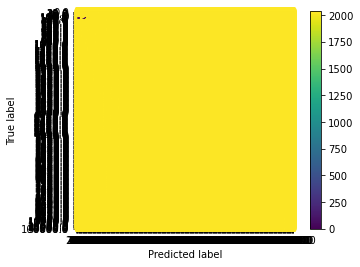

In [161]:
# Using the confusion matrix to summarise the prediction results


from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test, predictions)
confusion_matrix(y_test, predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [164]:
from sklearn.metrics import multilabel_confusion_matrix
y_unique = y_test.unique()
mcm =model(y_test, mcm, labels = y_unique)
mcm

NameError: name 'mcm' is not defined

In [ ]:
# Randon Forest Classifer

In [159]:
kiva_df1.head()

,funded_amount,loan_amount,activity,sector,country,disbursed_time,funded_time,term_in_months,lender_count,repayment_interval,genders
0,300.0,300.0,Fruits & Vegetables,Food,Pakistan,2013-12,2014-01,12.0,12,irregular,female
1,575.0,575.0,Rickshaw,Transportation,Pakistan,2013-12,2014-01,11.0,14,irregular,females
2,150.0,150.0,Transportation,Transportation,India,2013-12,2014-01,43.0,6,bullet,female
3,200.0,200.0,Embroidery,Arts,Pakistan,2013-12,2014-01,11.0,8,irregular,female
5,250.0,250.0,Services,Services,Kenya,2014-01,2014-01,4.0,6,irregular,female


In [165]:
random_kiva_df = kiva_df1

In [168]:
X_rand= random_kiva_df.drop(['loan_amount'], axis=1)
y_rand= random_kiva_df.loan_amount


In [169]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 30% test


In [170]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier



In [171]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [172]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [173]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


In [174]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.86


In [176]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [177]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


RandomForestClassifier()

In [178]:
from sklearn.ensemble import RandomForestClassifier



In [179]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [180]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.024 seconds


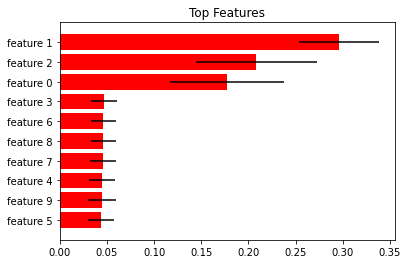

In [195]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Building a forest of features
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Ploting the feature importances of the forest
plt.figure()
plt.title('Top Features')
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")

# indices for a list of labels.
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

# Decision Tree Classifer

In [190]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[55  3  9]
 [ 6 62  3]
 [ 6  1 55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        67
           1       0.94      0.87      0.91        71
           2       0.82      0.89      0.85        62

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



In [192]:
#from sklearn.tree import DecisionTreeClassifier


In [194]:

#classifier = DecisionTreeClassifier()
#classifier.fit(X_train, y_train)
#y_pred = classifier.predict(X_test)
#y_pred = classifier.predict(X_test)


# Links

- https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
- https://www.analyticsvidhya.com/blog/2021/02/interactive-widget-based-hyperparameter-tuning-and-tracking-in-pywedge/
- 